In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [11]:
winter_data = pd.read_csv('Tie_9_Jyväskylä.csv')

In [ ]:
# some notes 
#bar chart between airtemp and serftemp скорее нет
# line chart trend по времени
# histogram для чего 
# scatter для взаимоотношений

In [7]:
winter_data.head()

,ts,airTemp,roadTemp,friction3,humidity,dewpoint,precipitation
0,2021-04-16 03:44:00,-1.1,0.1,NaN,77.0,-4.6,0
1,2021-04-16 03:54:00,-1.2,0.1,NaN,78.0,-4.6,0
2,2021-04-16 04:04:00,-1.2,0.0,NaN,78.0,-4.6,0
3,2021-04-16 04:14:00,-1.3,-0.3,NaN,78.0,-4.7,0
4,2021-04-16 04:24:00,-1.4,-0.4,NaN,78.0,-4.7,0


In [3]:
print(winter_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181586 entries, 0 to 181585
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ts             181586 non-null  object 
 1   airTemp        181586 non-null  float64
 2   roadTemp       181586 non-null  float64
 3   friction3      41957 non-null   float64
 4   humidity       181582 non-null  float64
 5   dewpoint       181586 non-null  float64
 6   precipitation  181586 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 9.7+ MB
None


In [8]:
winter_data.dtypes

ts                object
airTemp          float64
roadTemp         float64
friction3        float64
humidity         float64
dewpoint         float64
precipitation      int64
dtype: object

In [9]:
winter_data['ts'].unique()

array(['2021-04-16 03:44:00', '2021-04-16 03:54:00',
       '2021-04-16 04:04:00', ..., '2024-10-15 11:08:49',
       '2024-10-15 11:13:49', '2024-10-15 11:28:49'], dtype=object)

In [10]:
winter_data.nunique()

ts               181586
airTemp             627
roadTemp            784
friction3            71
humidity             84
dewpoint            547
precipitation         7
dtype: int64

In [4]:
winter_data['ts'].describe()

count                  181586
unique                 181586
top       2021-04-16 03:44:00
freq                        1
Name: ts, dtype: object

In [5]:
winter_data['ts'] = pd.to_datetime(winter_data['ts'], errors='coerce')
print(winter_data.dtypes)

ts               datetime64[ns]
airTemp                 float64
roadTemp                float64
friction3               float64
humidity                float64
dewpoint                float64
precipitation             int64
dtype: object


In [6]:
winter_data.describe()

,ts,airTemp,roadTemp,friction3,humidity,dewpoint,precipitation
count,181586,181586.000000,181586.000000,41957.000000,181582.000000,181586.000000,181586.000000
mean,2023-01-15 03:34:46.877066496,6.480229,9.237335,0.761245,78.460343,2.343462,0.486177
min,2021-04-16 03:44:00,-30.400000,-28.100000,0.120000,17.000000,-33.500000,0.000000
25%,2022-02-27 05:16:30,-1.200000,-1.300000,0.750000,66.000000,-4.000000,0.000000
50%,2023-01-14 20:49:35.500000,6.800000,8.100000,0.820000,85.000000,2.400000,0.000000
75%,2023-12-01 15:46:04,15.000000,18.400000,0.820000,94.000000,10.000000,0.000000
max,2024-10-15 11:28:49,32.200000,57.800000,0.820000,100.000000,21.100000,6.000000
std,NaN,10.585281,13.564276,0.122540,19.035071,9.178826,1.214273


In [7]:
winter_data['airTemp'].describe()

count    181586.000000
mean          6.480229
std          10.585281
min         -30.400000
25%          -1.200000
50%           6.800000
75%          15.000000
max          32.200000
Name: airTemp, dtype: float64

In [8]:
winter_data['roadTemp'].describe()

count    181586.000000
mean          9.237335
std          13.564276
min         -28.100000
25%          -1.300000
50%           8.100000
75%          18.400000
max          57.800000
Name: roadTemp, dtype: float64

In [9]:
winter_data['friction3'].describe()

count    41957.000000
mean         0.761245
std          0.122540
min          0.120000
25%          0.750000
50%          0.820000
75%          0.820000
max          0.820000
Name: friction3, dtype: float64

In [10]:
winter_data['humidity'].describe()

count    181582.000000
mean         78.460343
std          19.035071
min          17.000000
25%          66.000000
50%          85.000000
75%          94.000000
max         100.000000
Name: humidity, dtype: float64

In [11]:
winter_data['dewpoint'].describe()

count    181586.000000
mean          2.343462
std           9.178826
min         -33.500000
25%          -4.000000
50%           2.400000
75%          10.000000
max          21.100000
Name: dewpoint, dtype: float64

In [12]:
winter_data['precipitation'].describe()

count    181586.000000
mean          0.486177
std           1.214273
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: precipitation, dtype: float64

In [13]:
print("Initial data shape:",winter_data.shape)
print("Missing values in each column:")
print(winter_data.isnull().sum())

Initial data shape: (181586, 7)
Missing values in each column:
ts                    0
airTemp               0
roadTemp              0
friction3        139629
humidity              4
dewpoint              0
precipitation         0
dtype: int64


<Axes: >

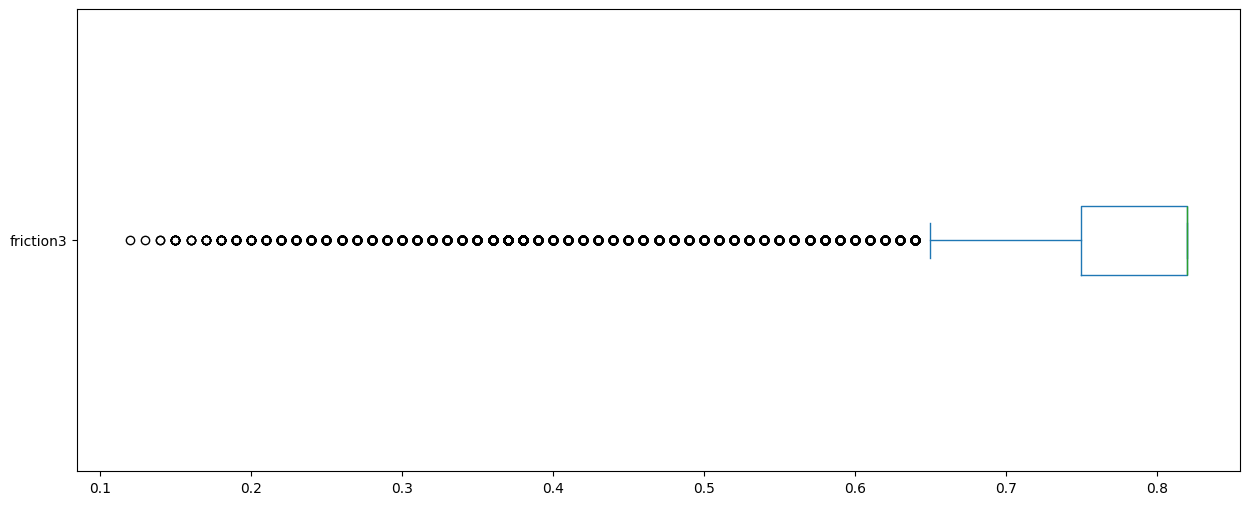

In [14]:
winter_data['friction3'].plot(kind='box',vert=False,figsize=(15,6))

<Axes: ylabel='Density'>

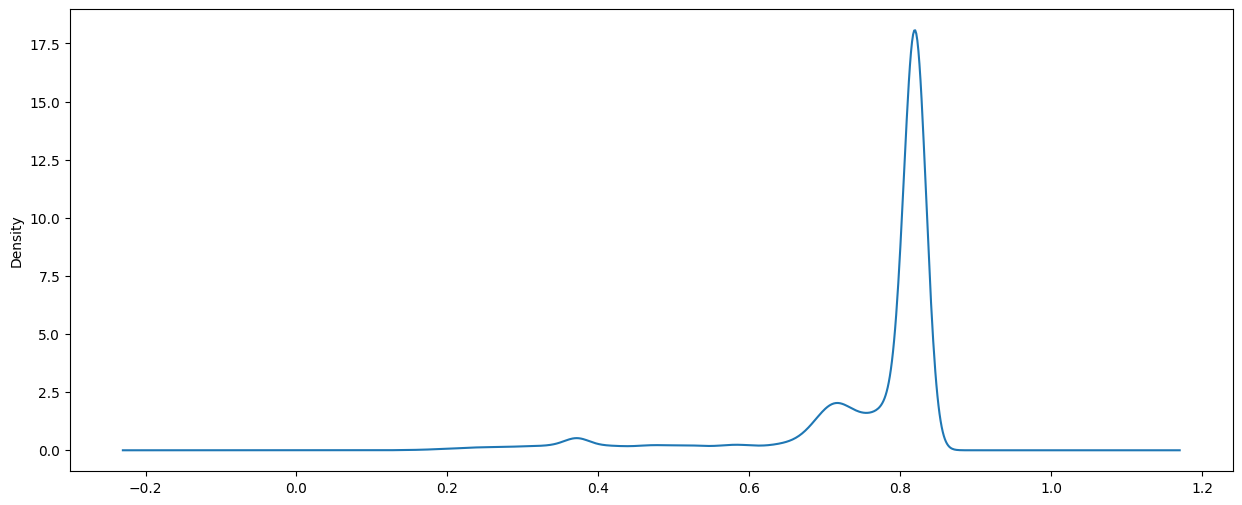

In [15]:
winter_data['friction3'].plot(kind='density',figsize=(15,6))

<Axes: ylabel='Density'>

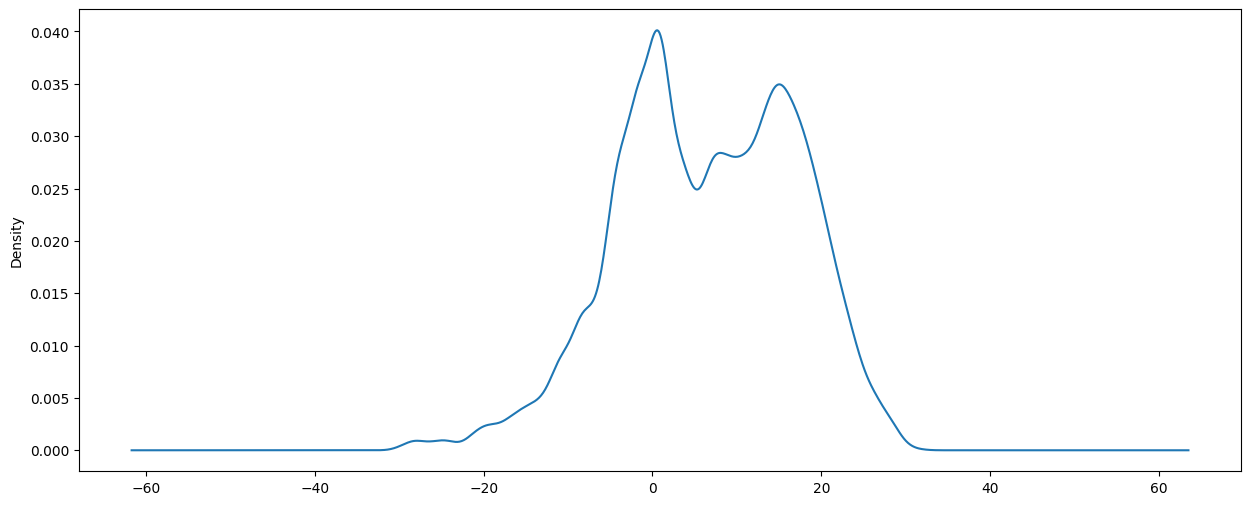

In [16]:
winter_data['airTemp'].plot(kind='density',figsize=(15,6))

<Axes: ylabel='Density'>

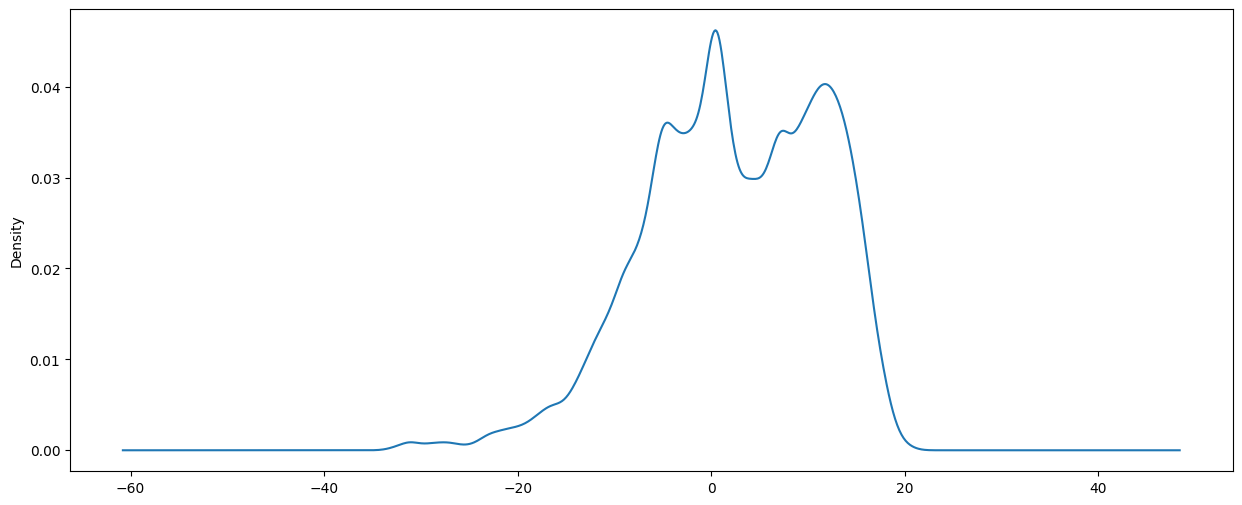

In [17]:
winter_data['dewpoint'].plot(kind='density',figsize=(15,6))

Text(0.5, 0, 'friction')

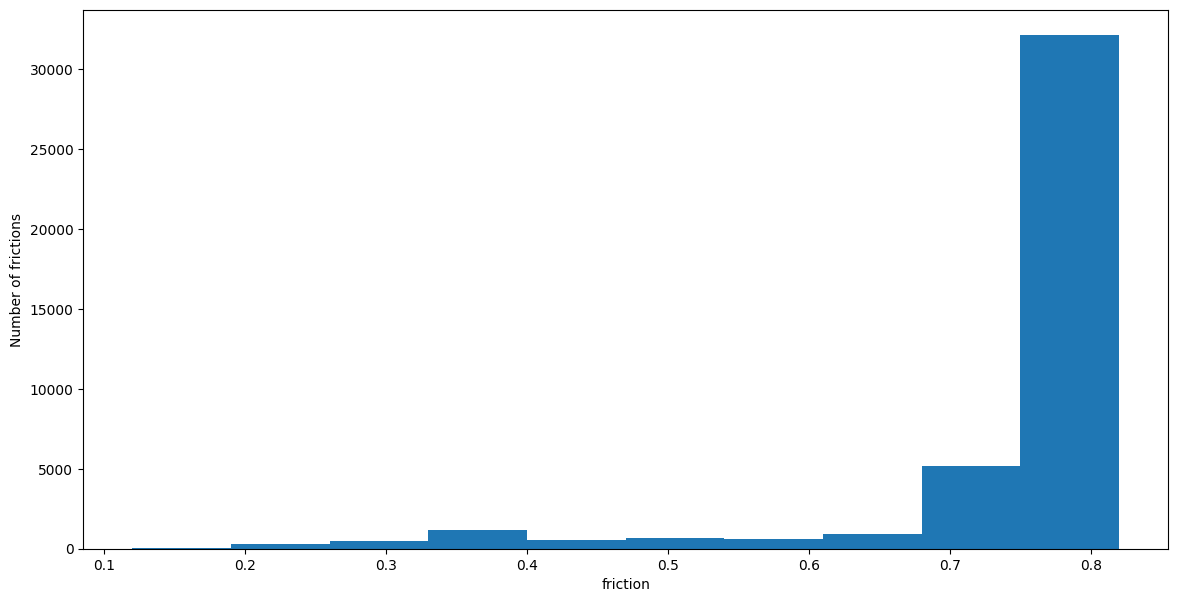

In [18]:
ax = winter_data['friction3'].plot(kind='hist',figsize=(14,7))
ax.set_ylabel('Number of frictions')
ax.set_xlabel('friction')

<Axes: ylabel='count'>

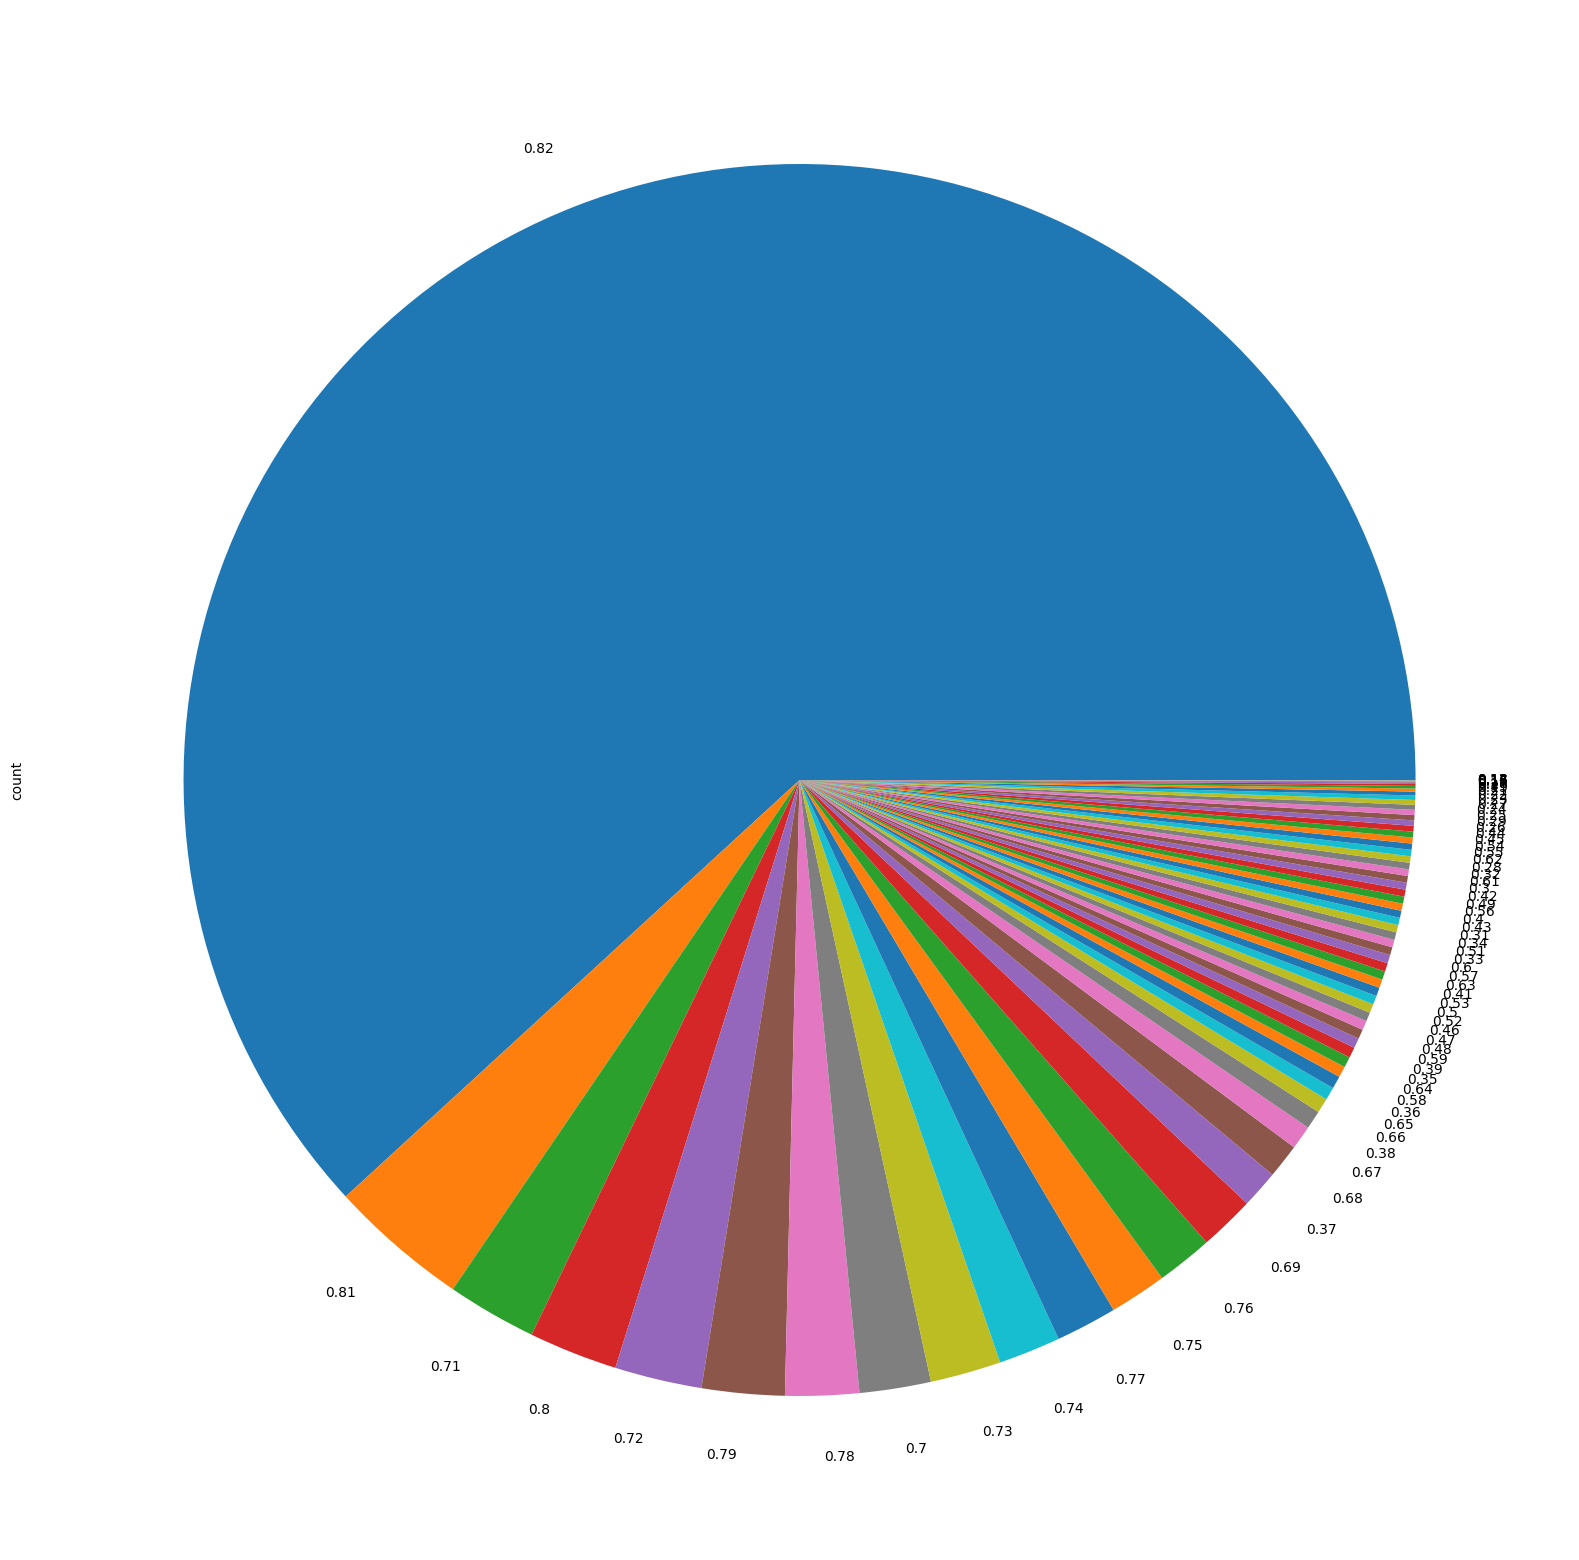

In [19]:
winter_data['friction3'].value_counts().plot(kind = 'pie',figsize=(20,20))

In [20]:
corr = winter_data.corr()
corr

,ts,airTemp,roadTemp,friction3,humidity,dewpoint,precipitation
ts,1.000000,-0.006504,-0.010119,-0.437724,0.038545,0.011634,0.016821
airTemp,-0.006504,1.000000,0.960076,0.418372,-0.460808,0.909714,-0.366383
roadTemp,-0.010119,0.960076,1.000000,0.408661,-0.591354,0.800397,-0.349075
friction3,-0.437724,0.418372,0.408661,1.000000,-0.332248,0.366646,-0.550886
humidity,0.038545,-0.460808,-0.591354,-0.332248,1.000000,-0.058344,0.292563
dewpoint,0.011634,0.909714,0.800397,0.366646,-0.058344,1.000000,-0.291232
precipitation,0.016821,-0.366383,-0.349075,-0.550886,0.292563,-0.291232,1.000000


In [21]:
#   plt.scatter(winter_data['ts'],winter_data['airTemp'])
#   plt.title("ts and airTemp")
#   plt.xlabel('ts')
#   plt.ylabel('airTemp')
#   plt.show()

In [22]:
print(type(winter_data['ts']))

<class 'pandas.core.series.Series'>


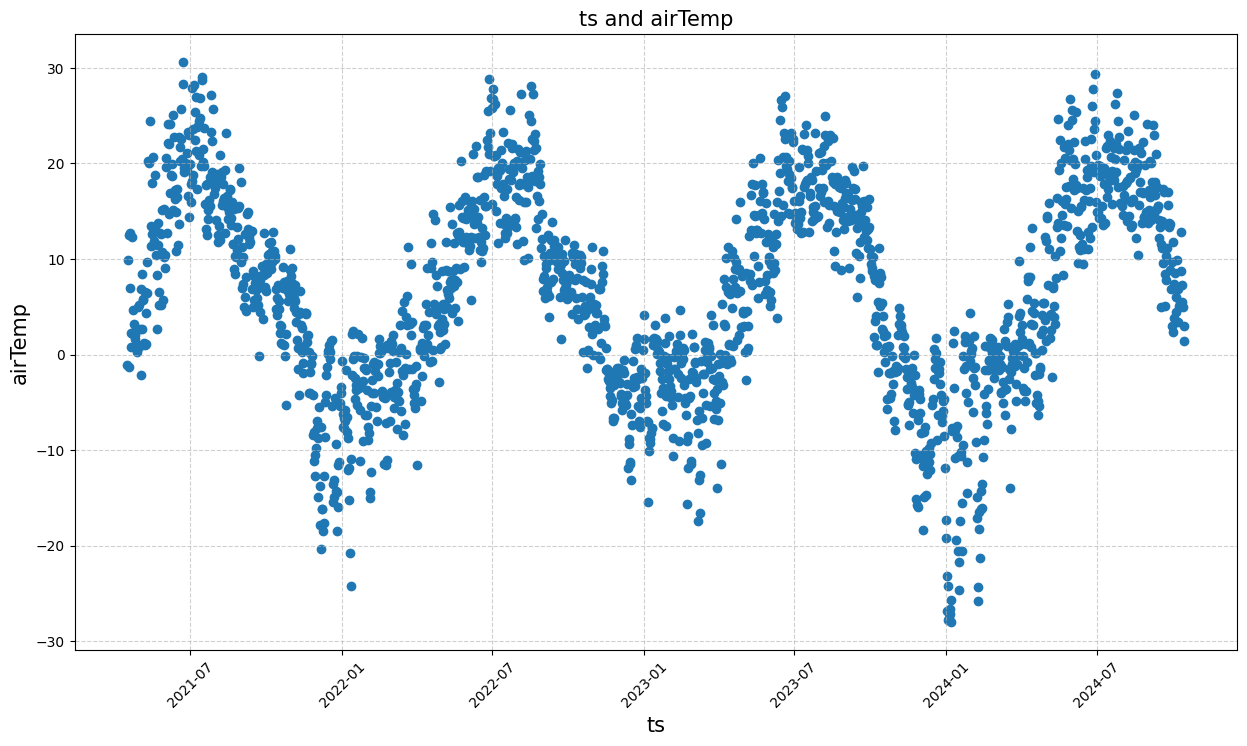

In [23]:
plt.figure(figsize=(15, 8))
plt.scatter(winter_data['ts'][::100], winter_data['airTemp'][::100])  # Eery 100 not evry 1
plt.title("ts and airTemp",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('airTemp',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



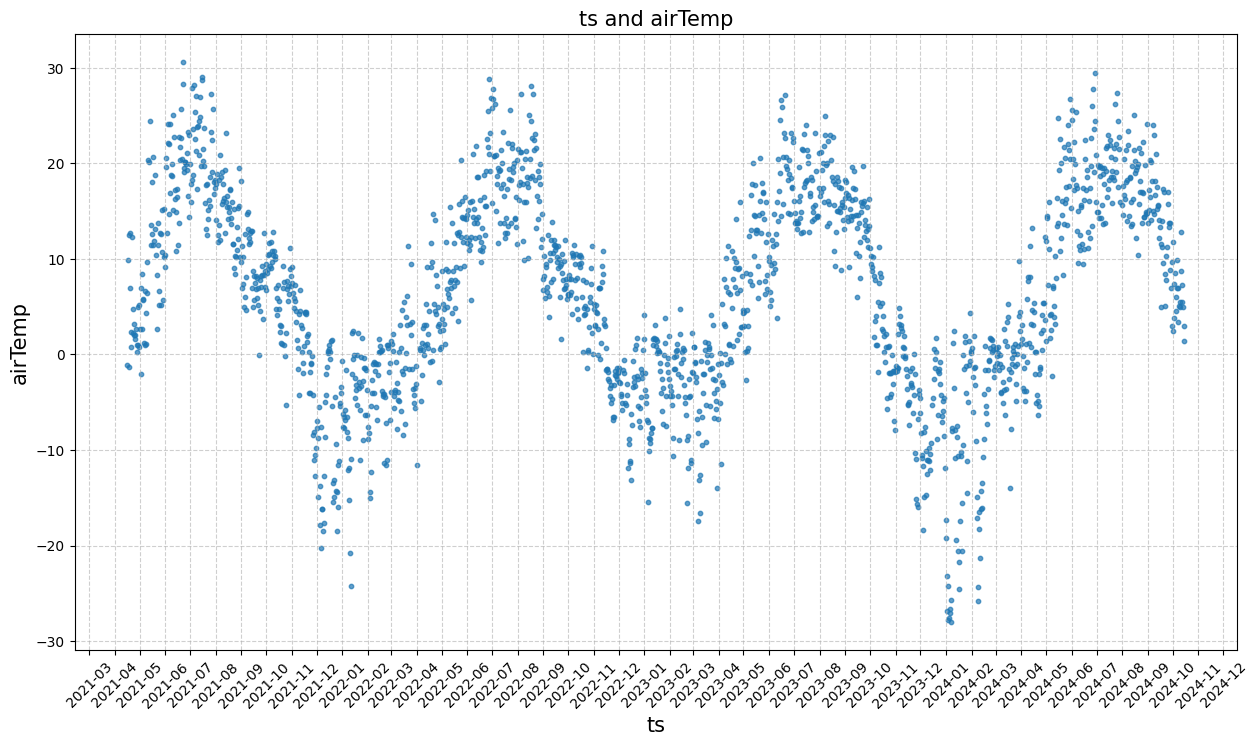

In [24]:
import matplotlib.dates as mdates
plt.figure(figsize=(15, 8))
plt.scatter(winter_data['ts'][::100], winter_data['airTemp'][::100],s=10, alpha=0.7)  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and airTemp",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('airTemp',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

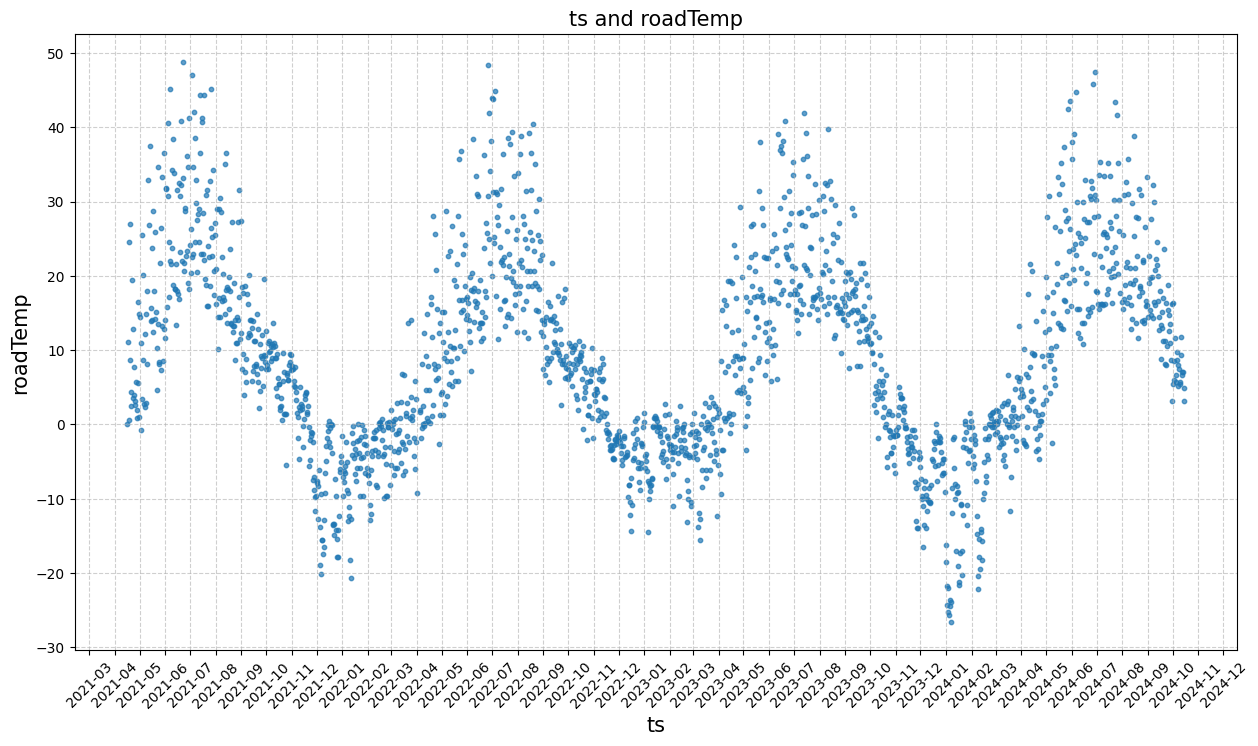

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(winter_data['ts'][::100], winter_data['roadTemp'][::100],s=10, alpha=0.7)  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and roadTemp",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('roadTemp',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

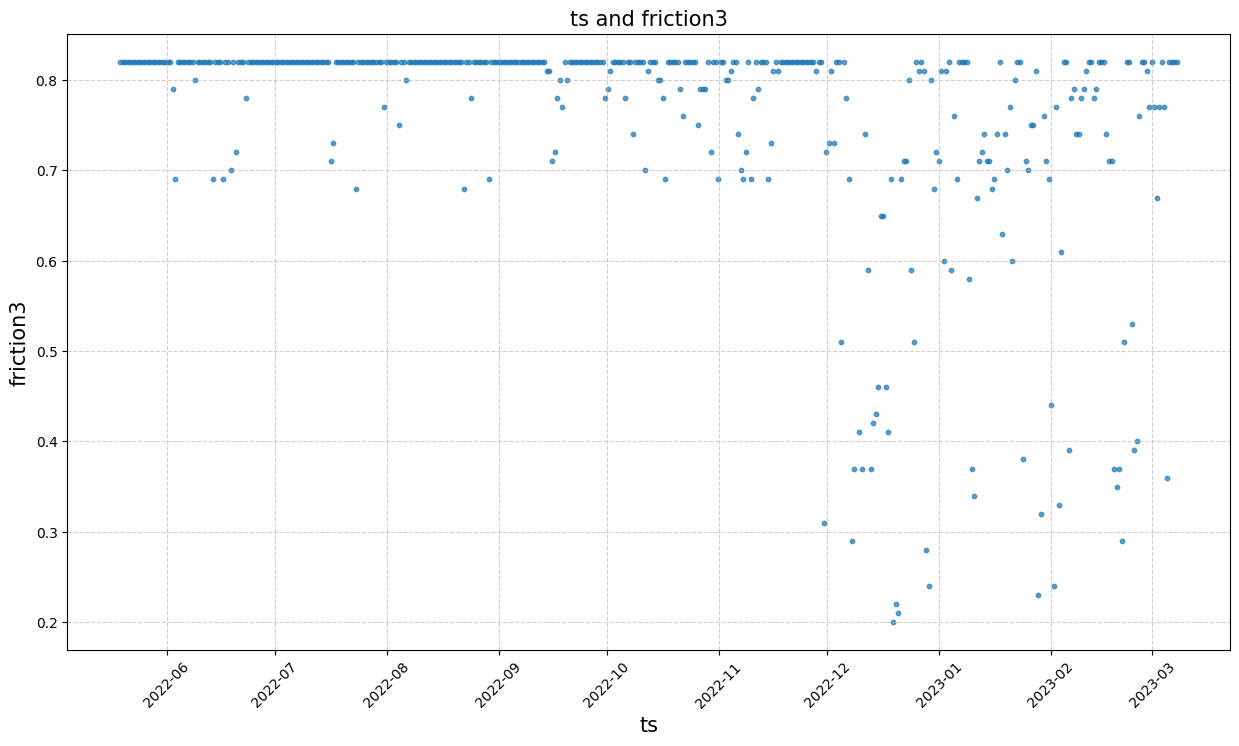

In [26]:
plt.figure(figsize=(15, 8))
plt.scatter(winter_data['ts'][::100], winter_data['friction3'][::100],s=10, alpha=0.7)  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and friction3",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('friction3',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

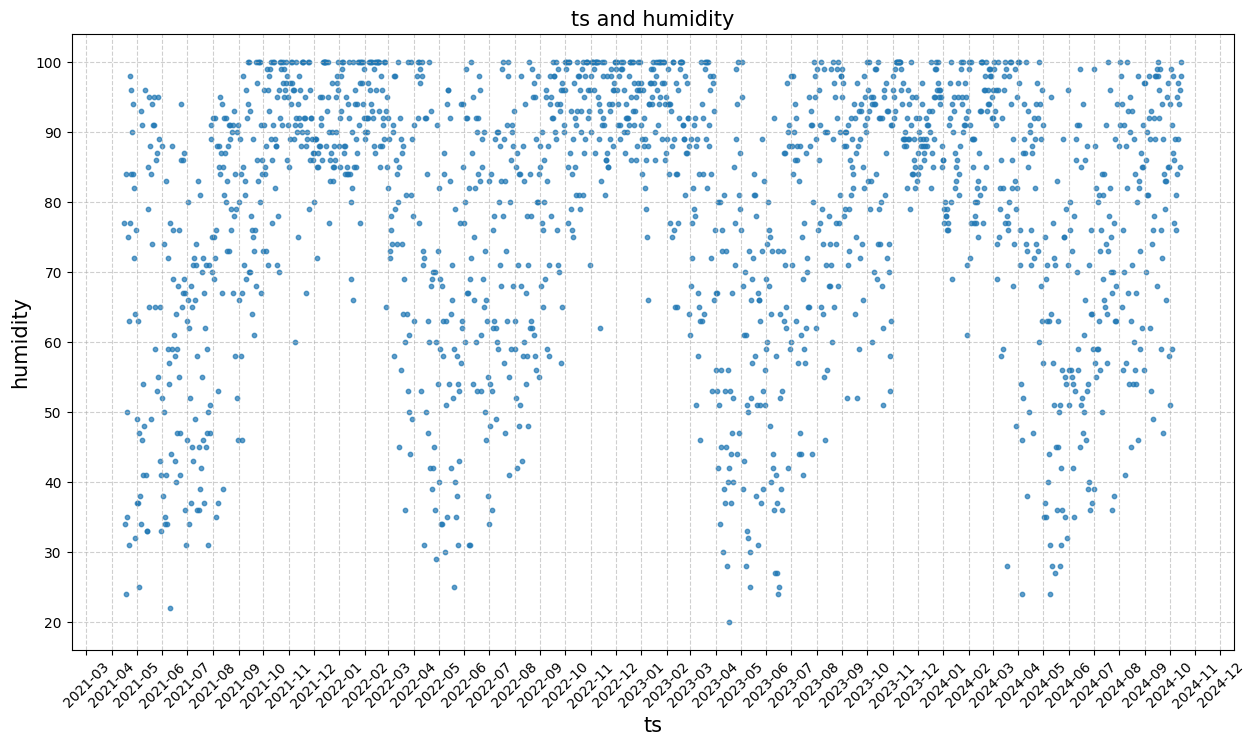

In [27]:
plt.figure(figsize=(15, 8))
plt.scatter(winter_data['ts'][::100], winter_data['humidity'][::100],s=10, alpha=0.7)  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and humidity",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('humidity',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

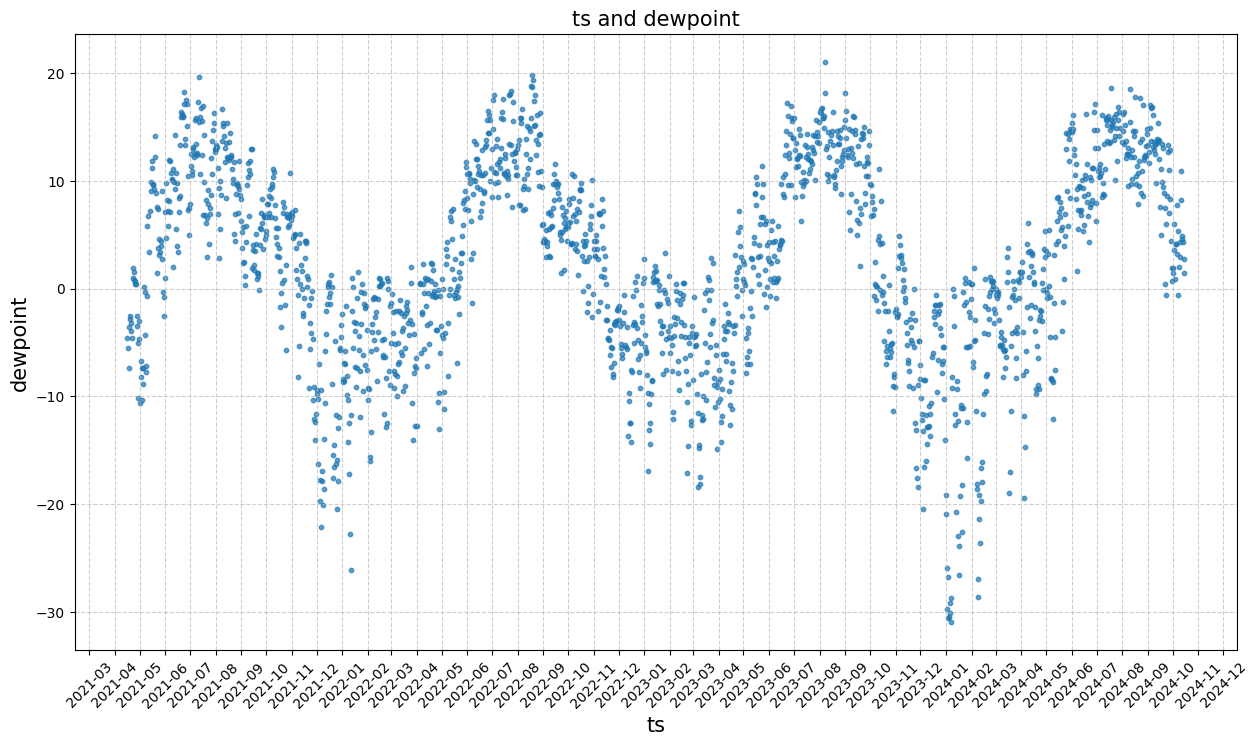

In [28]:
plt.figure(figsize=(15, 8))
plt.scatter(winter_data['ts'][::100], winter_data['dewpoint'][::100],s=10, alpha=0.7)  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and dewpoint",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('dewpoint',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

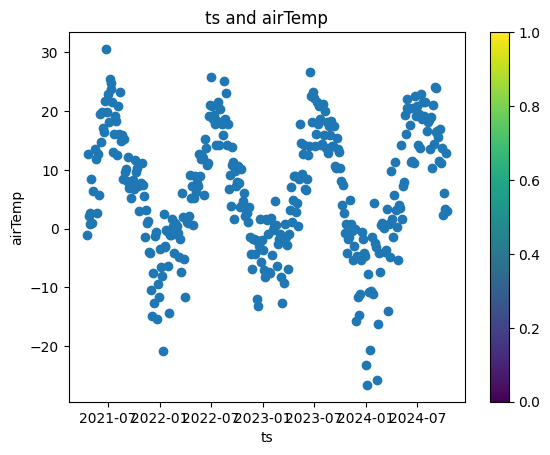

In [29]:
plt.scatter(winter_data['ts'][::500], winter_data['airTemp'][::500])  
plt.title("ts and airTemp")
plt.xlabel('ts')
plt.ylabel('airTemp')
plt.colorbar()
plt.show()

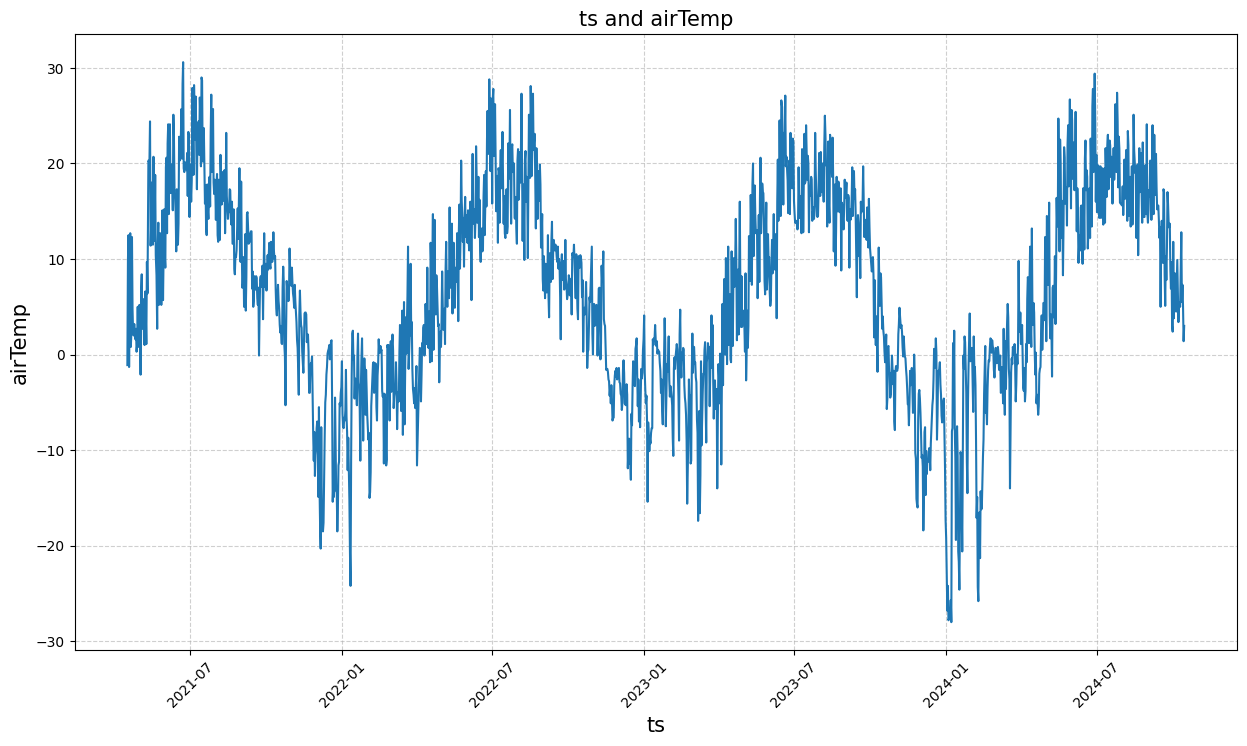

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(winter_data['ts'][::100], winter_data['airTemp'][::100])  # Eery 100 not evry 1
plt.title("ts and airTemp",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('airTemp',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

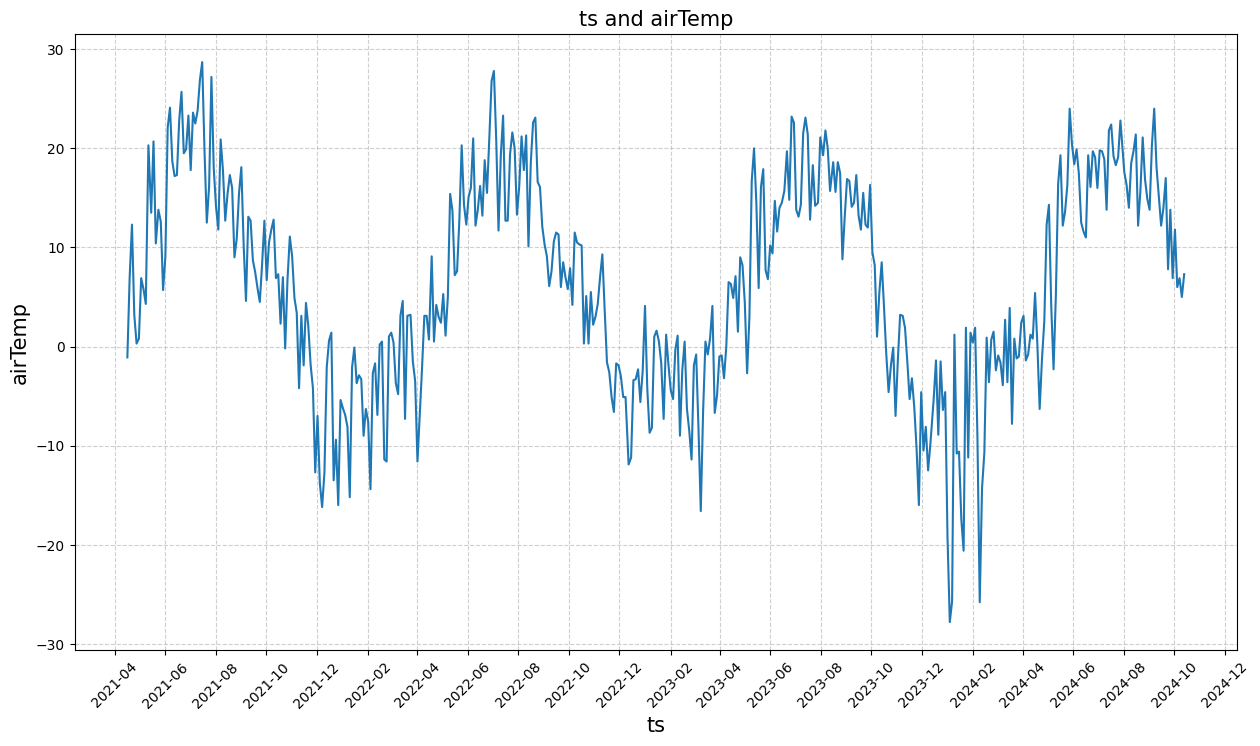

In [31]:
plt.figure(figsize=(15, 8))
plt.plot(winter_data['ts'][::400], winter_data['airTemp'][::400])  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and airTemp",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('airTemp',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

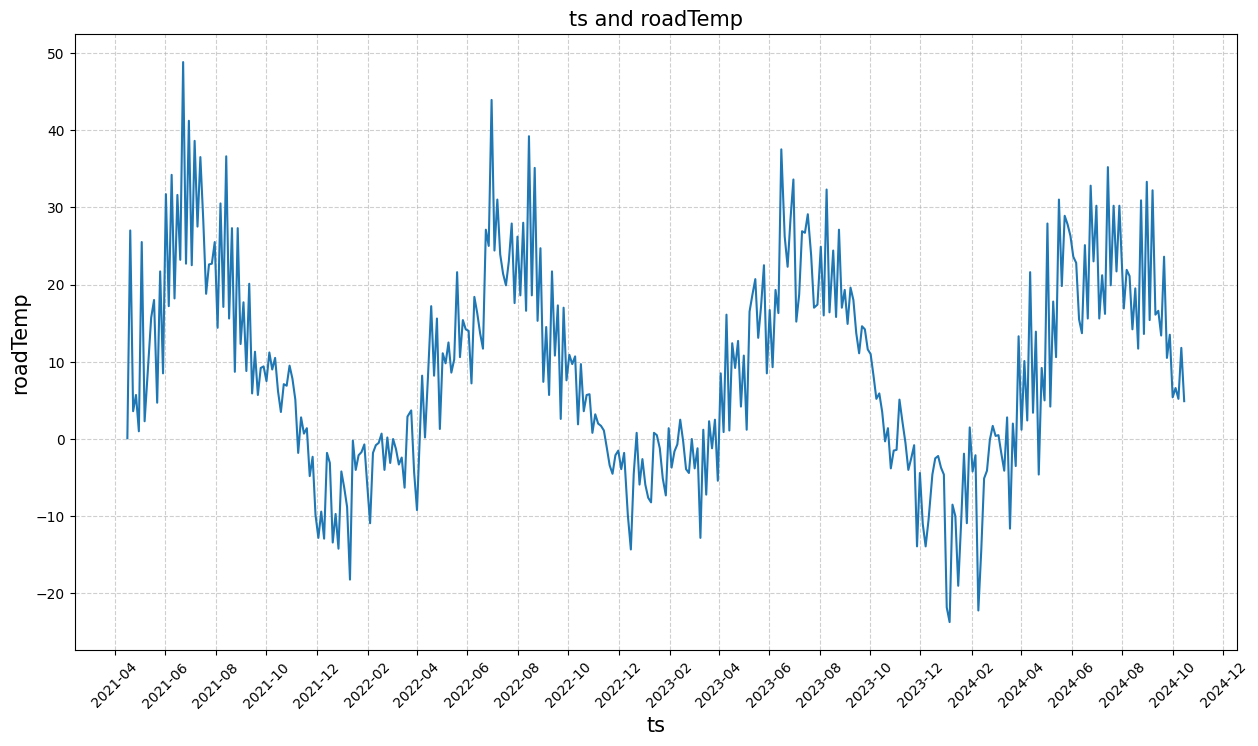

In [32]:
plt.figure(figsize=(15, 8))
plt.plot(winter_data['ts'][::500], winter_data['roadTemp'][::500])  # Eery 100 not evry 1
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.title("ts and roadTemp",fontsize=15)
plt.xlabel('ts',fontsize=15)
plt.ylabel('roadTemp',fontsize=15)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()